In [73]:
import numpy as np
#from sklearn.datasets import fetch_20newsgroups
import pandas as pd

dataset = pd.read_csv('segmentation_data.csv')

In [74]:
#dataset.values.tolist()
dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [31]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from time import time

#vectorizer = TfidfVectorizer(
#    max_df=0.5,
#    min_df=5,
#    stop_words="english",
#)
#t0 = time()
#X_tfidf = vectorizer.fit_transform(dataset.values.tolist())

#print(f"vectorization done in {time() - t0:.3f} s")
#print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

In [76]:
dataset.head()
#dataset[['Age','Education','Income']]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


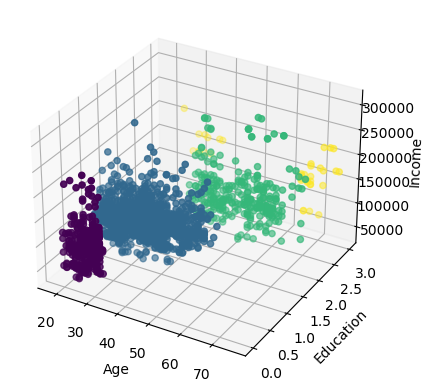

In [77]:
from matplotlib import pyplot as plt
import numpy as np

#fig = plt.figure()
#plt.scatter(dataset[['Education']], dataset[['Income']])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.scatter(dataset[['Income']],  dataset[['Age']], dataset[['Education']], c=dataset[['Education']])
ax.scatter(dataset[['Age']],  dataset[['Education']], dataset[['Income']], c=dataset[['Education']])

ax.set_xlabel('Age')
ax.set_ylabel('Education')
ax.set_zlabel('Income');

plt.show()

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset)
y_kmeans = kmeans.predict(dataset)

/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.00000767e+08 3.03296703e-01 4.35164835e-01 4.09406593e+01
  1.19340659e+00 1.54237231e+05 1.24835165e+00 1.23516484e+00]
 [1.00001221e+08 5.43209877e-01 5.14403292e-01 3.22201646e+01
  8.95061728e-01 7.91960288e+04 1.56378601e-01 1.64609053e-01]
 [1.00000646e+08 2.85714286e-01 4.00000000e-01 4.45904762e+01
  1.34285714e+00 2.25124867e+05 1.77142857e+00 1.46666667e+00]
 [1.00001039e+08 5.05241090e-01 5.27253669e-01 3.44329140e+01
  1.00314465e+00 1.14888383e+05 8.29140461e-01 7.14884696e-01]]


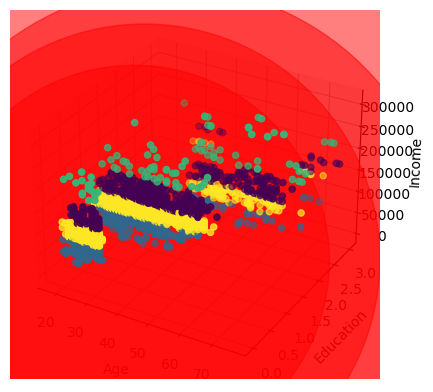

In [82]:
from sklearn.metrics import pairwise_distances_argmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

centers = kmeans.cluster_centers_
print(centers)

labels = pairwise_distances_argmin(dataset, centers)

ax.scatter(dataset[['Age']],  dataset[['Education']], dataset[['Income']], c=labels)

ax.set_xlabel('Age')
ax.set_ylabel('Education')
ax.set_zlabel('Income');

plt.scatter(centers[:, 3], centers[:, 4], centers[:, 5], c='red', alpha=0.5);
#new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

plt.show()